<a id="title"></a>
<div class="alert alert-block alert-success">
    <h1 style="text-align: center; color: black;">Indian Motorcycle Market Analysis: Predicting Resale Values and Market Trends 🏍️</h1>
</div>
<a id="intro"></a>
<div class="alert alert-block alert-warning">
    <h2 style="text-align: center; color: black;">Introduction</h2>
    <p>This notebook presents a comprehensive analysis of the Indian motorcycle market using a dataset of 10,000 bike sales records. We explore factors affecting motorcycle pricing and resale values across various Indian states, covering major brands like Honda, Royal Enfield, TVS, Yamaha, Hero, Bajaj, KTM, and Kawasaki.</p>
    <p>The analysis includes detailed statistical exploration, visualization of market trends, and the development of predictive models to estimate motorcycle resale values. We investigate how factors such as brand reputation, engine capacity, fuel efficiency, ownership history, and geographical location influence motorcycle depreciation and market value.</p>
    <p>By the end of this analysis, we aim to provide valuable insights for various stakeholders in the Indian two-wheeler market:</p>
    <ul>
        <li>Buyers seeking to understand depreciation patterns when purchasing motorcycles</li>
        <li>Sellers looking to optimize pricing strategies for maximum returns</li>
        <li>Dealers wanting to make data-driven inventory decisions</li>
        <li>Manufacturers interested in market positioning and competitive analysis</li>
    </ul>
    <p>Let's dive into the data and uncover the patterns driving India's vibrant motorcycle market!</p>
</div>
<a id="1"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Data Loading and Initial Exploration 📊</h2>
</div>

<a id="1"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Data Loading and Initial Exploration 📊</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

# Set styling for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [2]:
df=pd.read_csv("/kaggle/input/indian-bike-sales-dataset/bike_sales_india.csv")

<a id="2"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 2: Understanding the Dataset Structure 🔍</h2>
</div>

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())

Dataset Shape: (10000, 15)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-nul

<a id="3"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 3: Exploratory Data Analysis - Univariate Analysis 📈</h2>
</div>

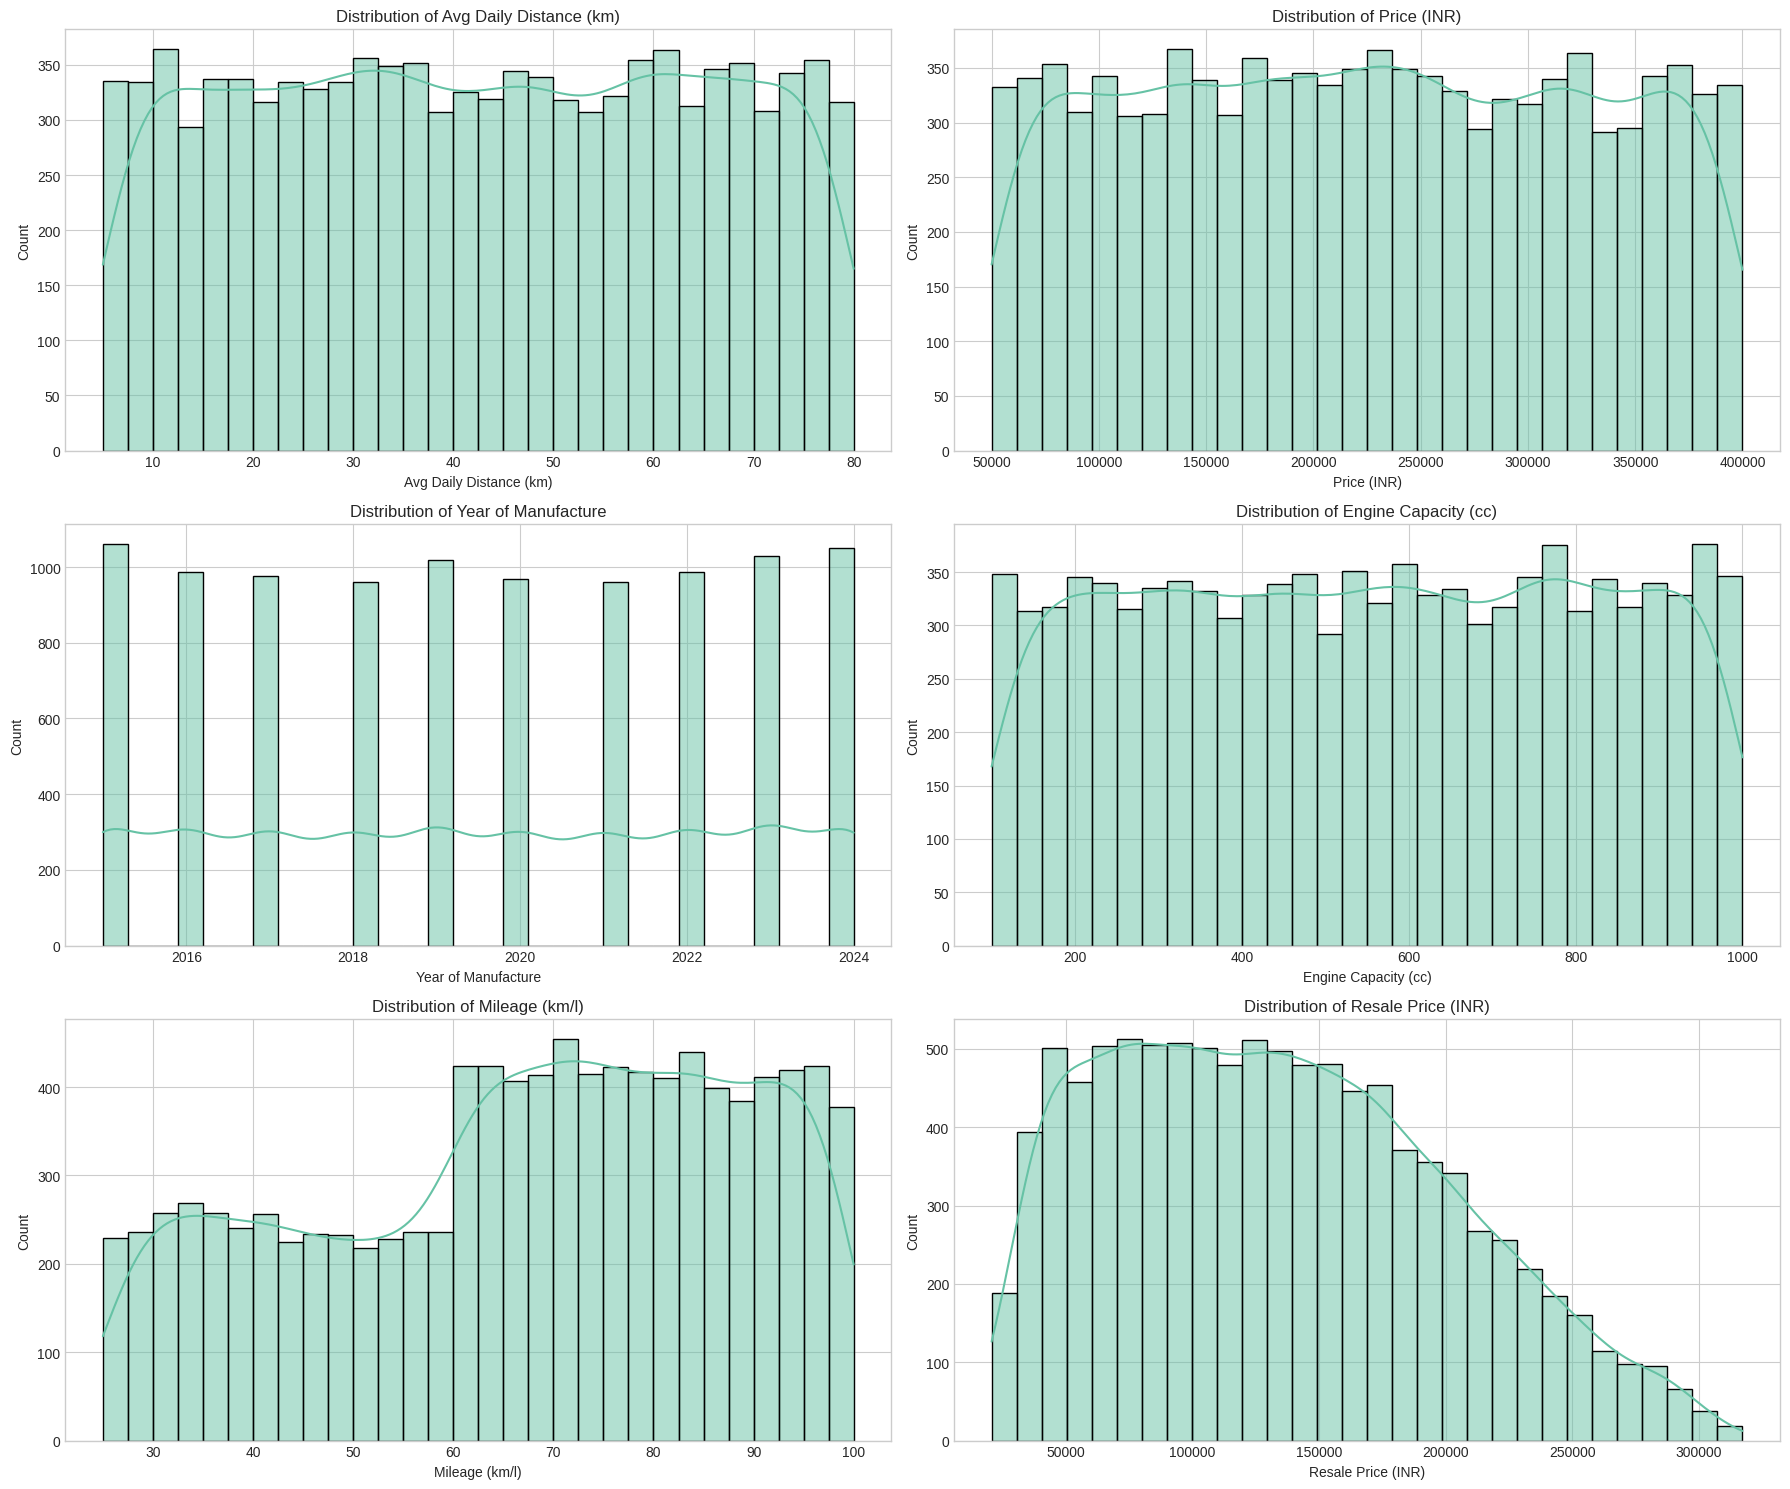

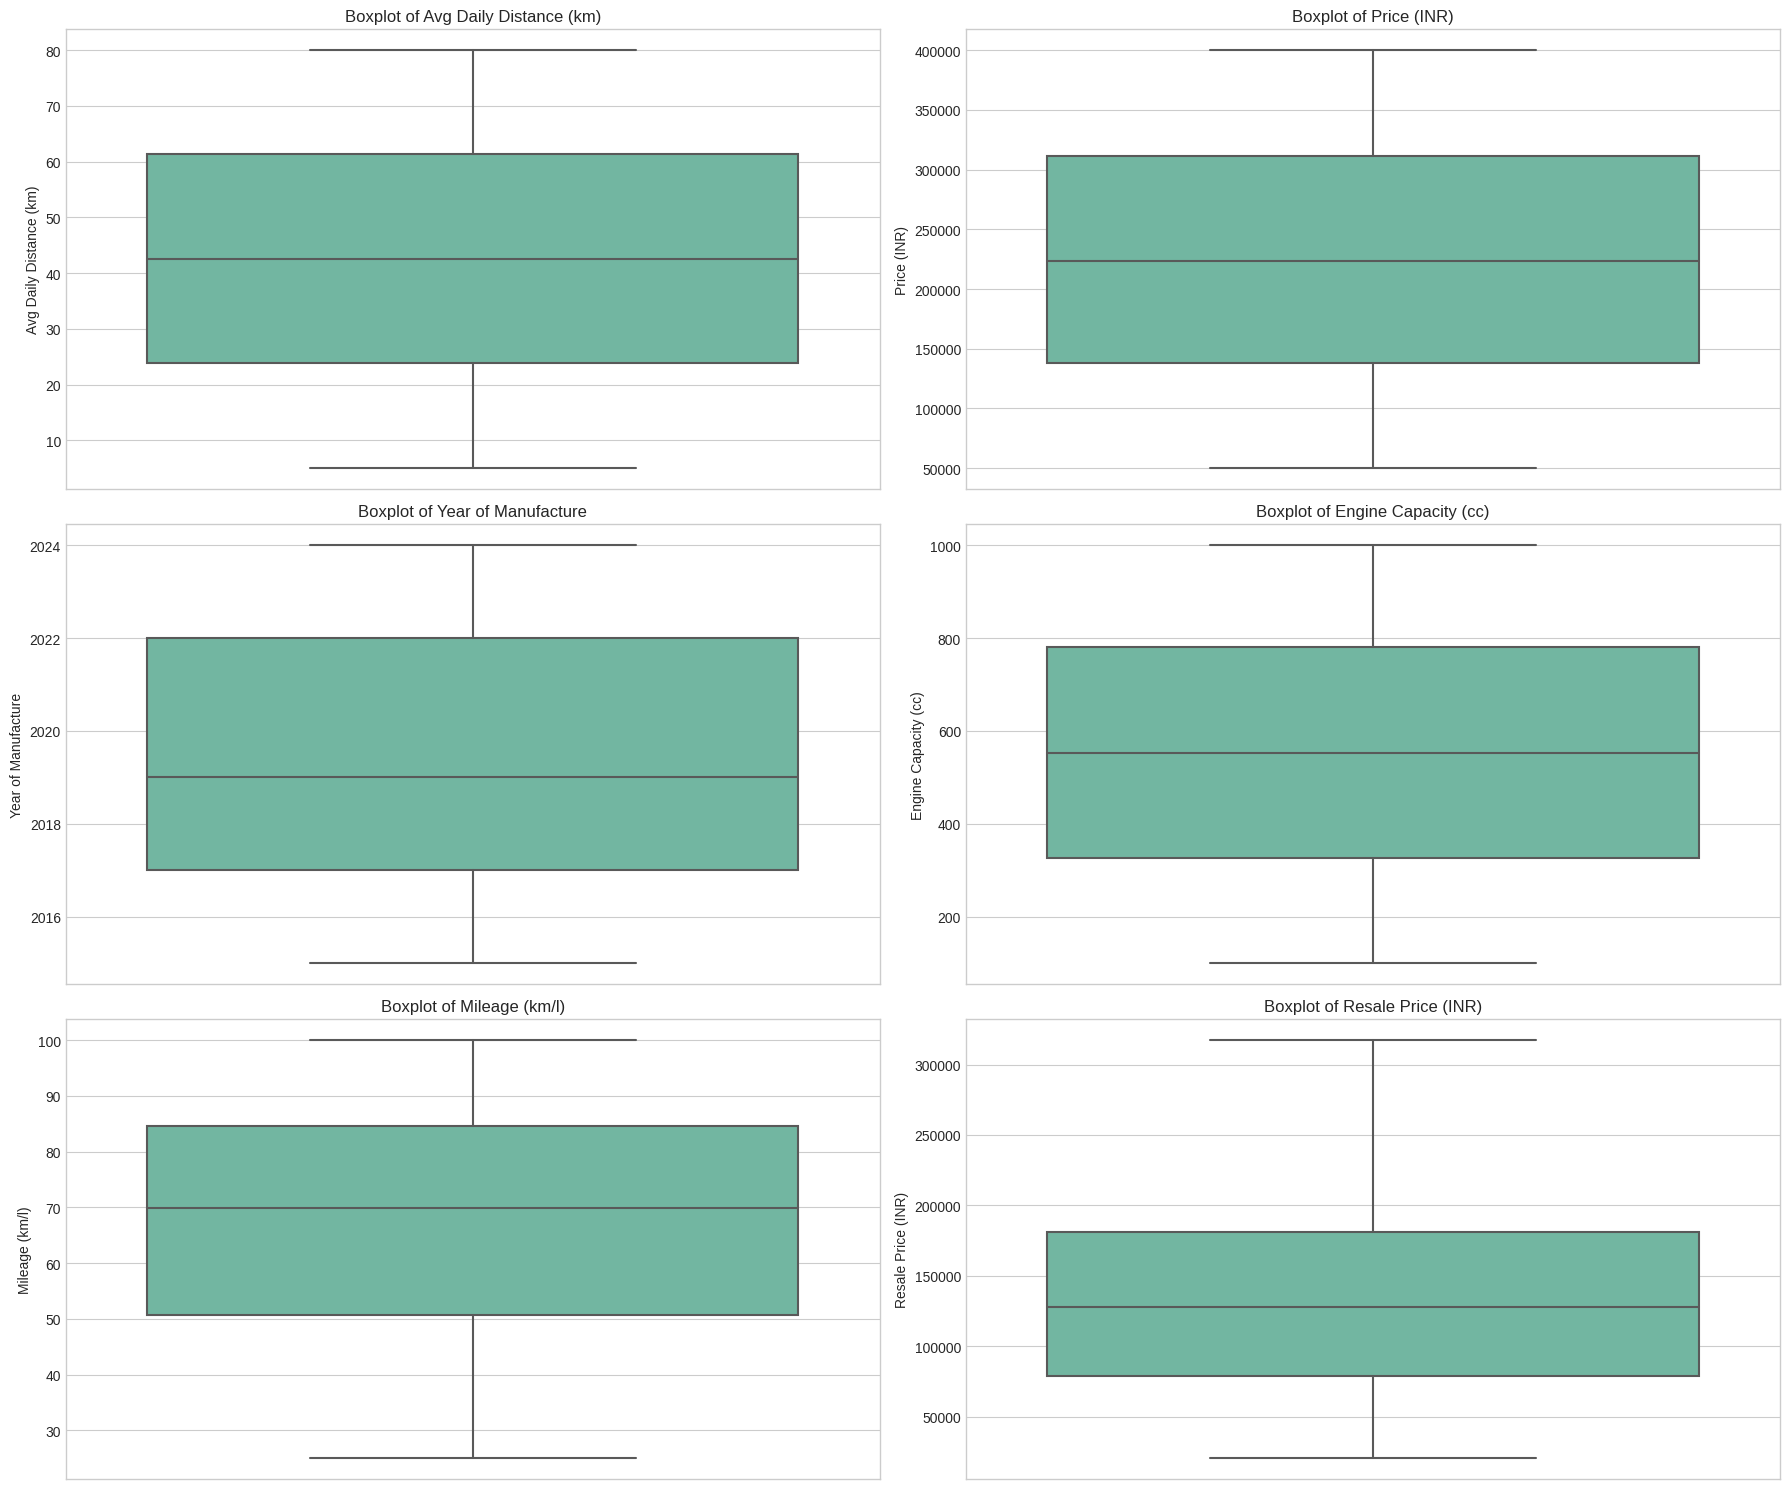

In [4]:
# Create a function to plot distribution of numerical variables
def plot_numerical_distribution(df, columns, bins=30, figsize=(18, 15)):
    plt.figure(figsize=figsize)
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns)//2 + len(columns)%2, 2, i)
        sns.histplot(df[column], kde=True, bins=bins)
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.tight_layout()
    plt.show()

# Select numerical columns to analyze
numerical_columns = ['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture', 
                    'Engine Capacity (cc)', 'Mileage (km/l)', 'Resale Price (INR)']

# Plot distributions
plot_numerical_distribution(df, numerical_columns)

# Box plots to identify outliers
plt.figure(figsize=(18, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//2 + len(numerical_columns)%2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.tight_layout()
plt.show()

<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 4: Categorical Data Analysis 📊</h2>
</div>

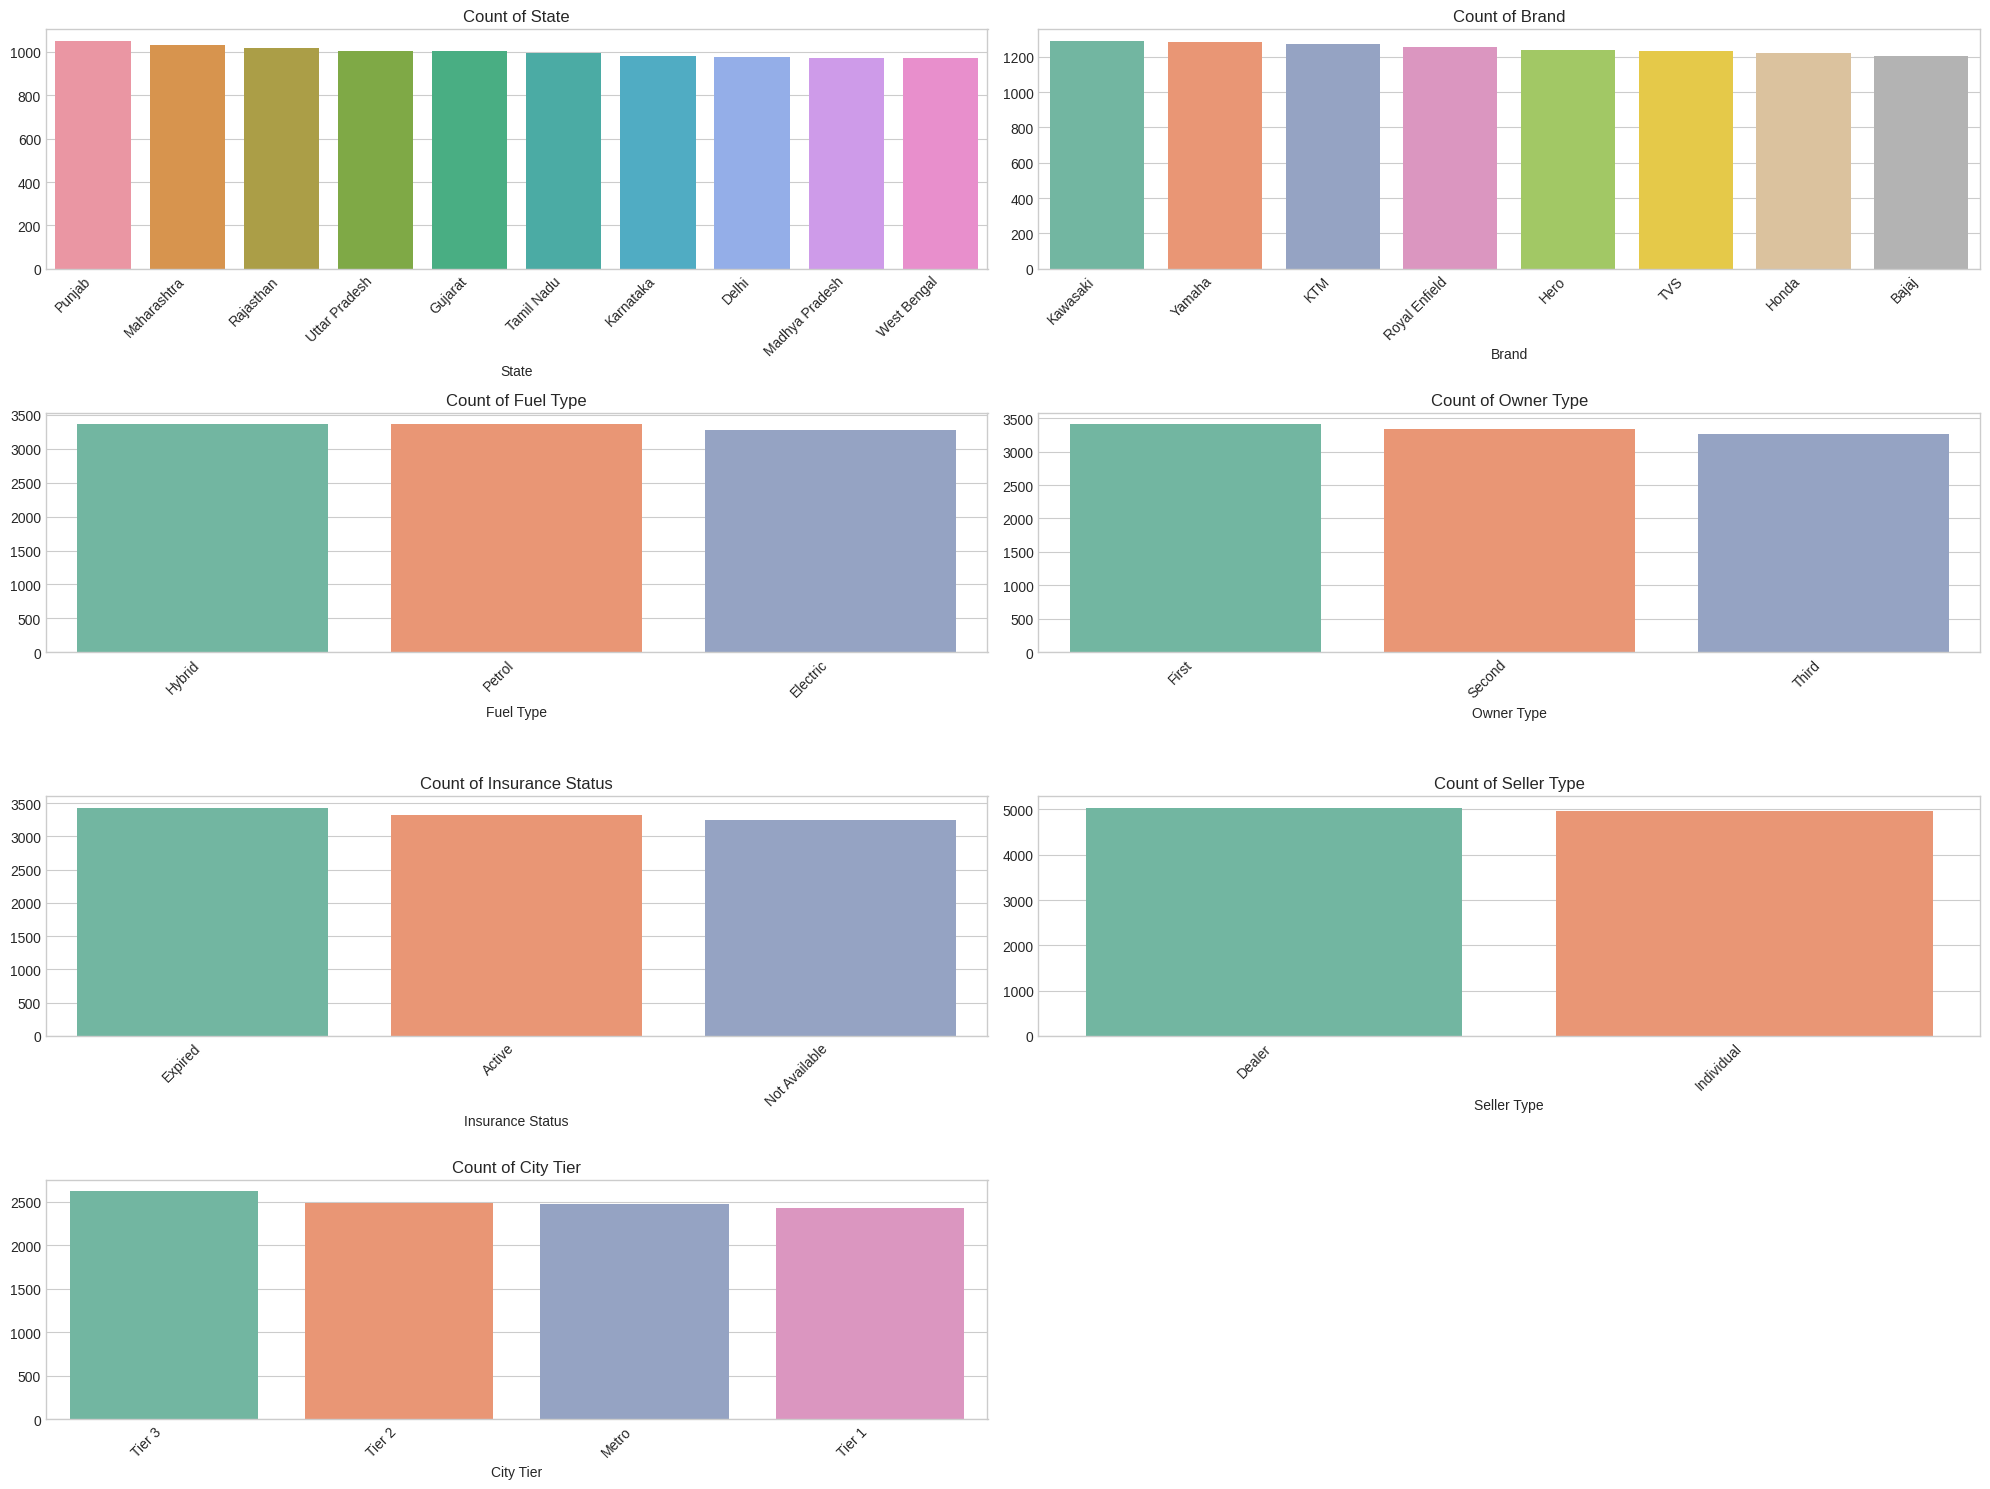

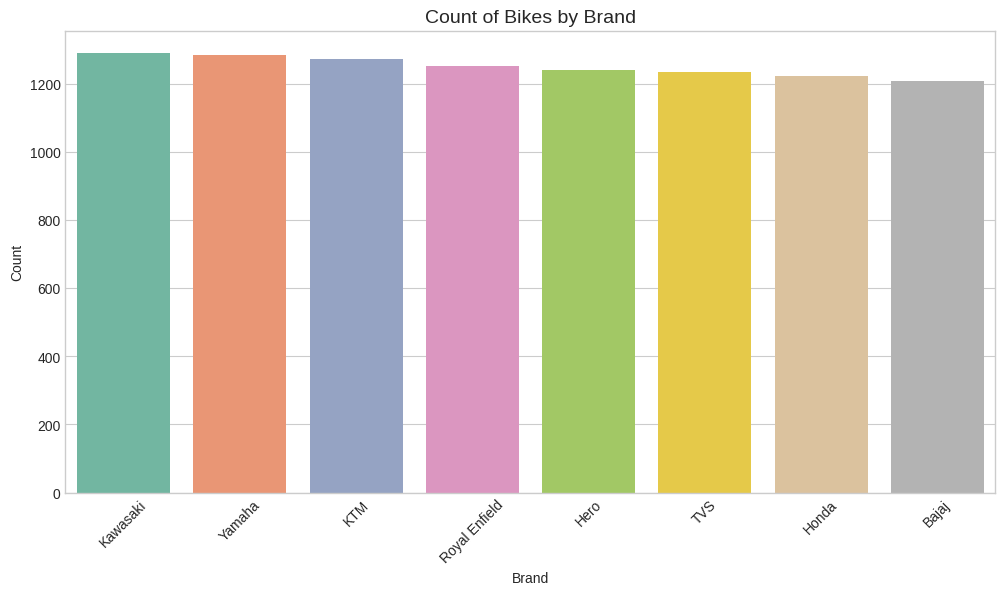

In [5]:
# Create a function to plot categorical variables
def plot_categorical_counts(df, columns, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns)//2 + len(columns)%2, 2, i)
        value_counts = df[column].value_counts().sort_values(ascending=False)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Count of {column}', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
    plt.show()

# Select categorical columns to analyze
categorical_columns = ['State', 'Brand', 'Fuel Type', 'Owner Type', 
                       'Insurance Status', 'Seller Type', 'City Tier']

# Plot categorical variable distributions
plot_categorical_counts(df, categorical_columns)

# Brand analysis - specific focus since it's important
plt.figure(figsize=(12, 6))
brand_counts = df['Brand'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Count of Bikes by Brand', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

<a id="5"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Bivariate Analysis - Relationship between Variables 🔄</h2>
</div>

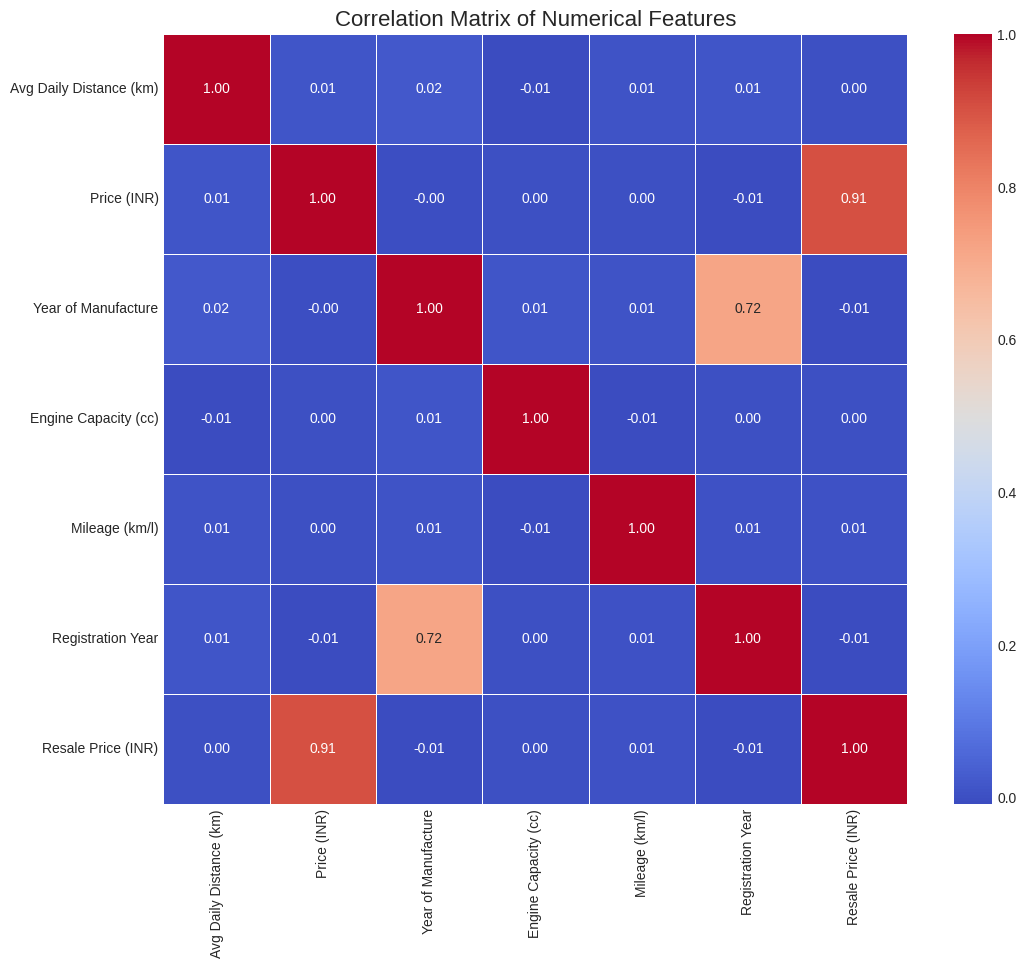

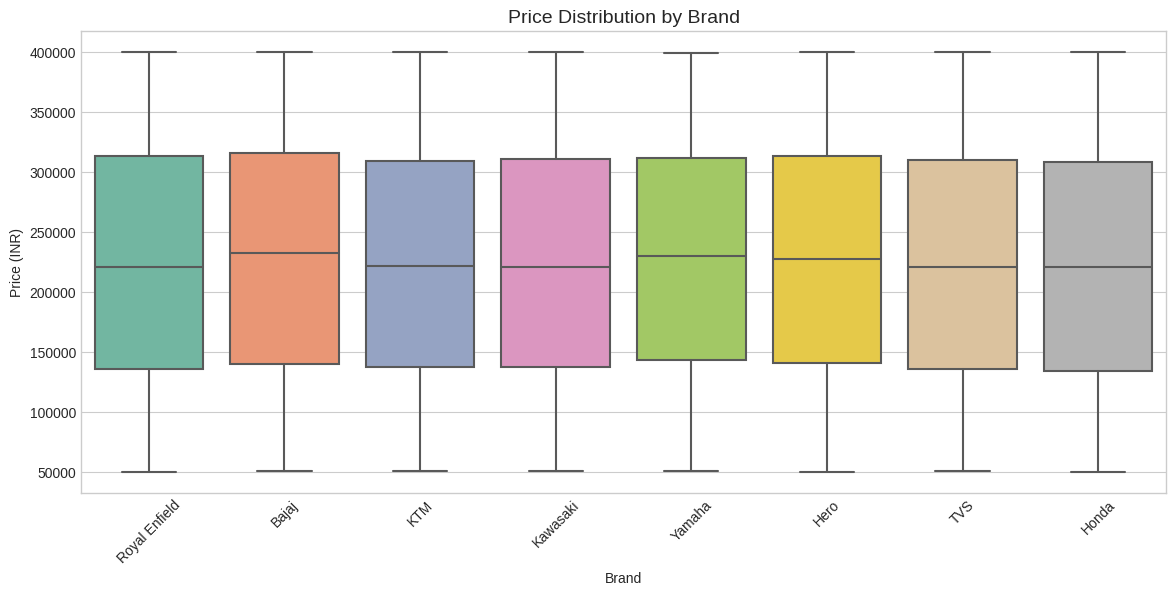

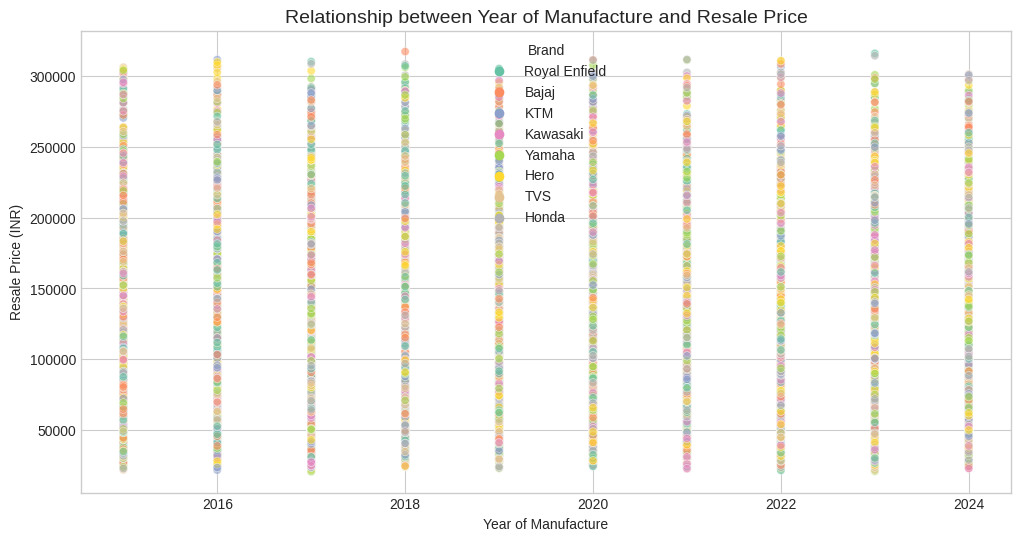

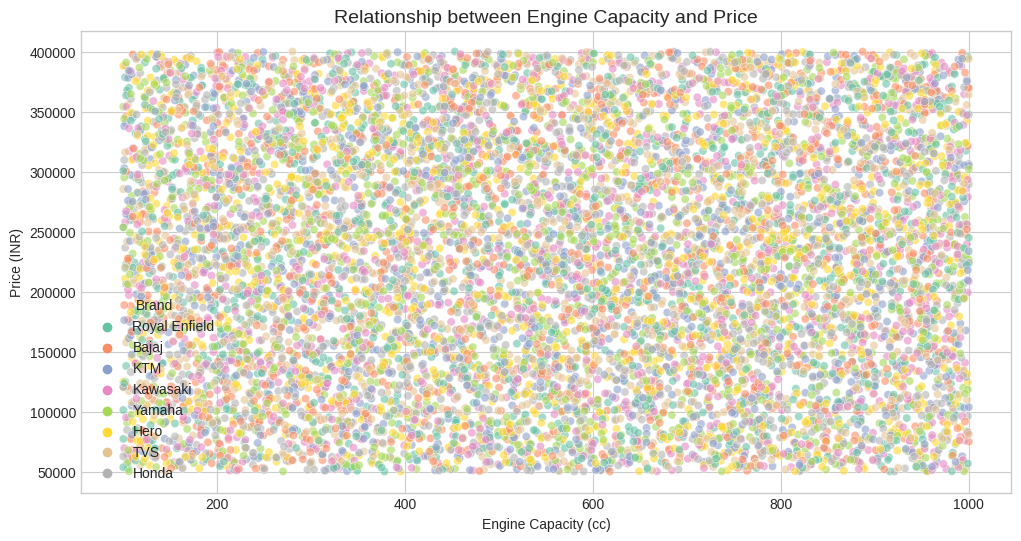

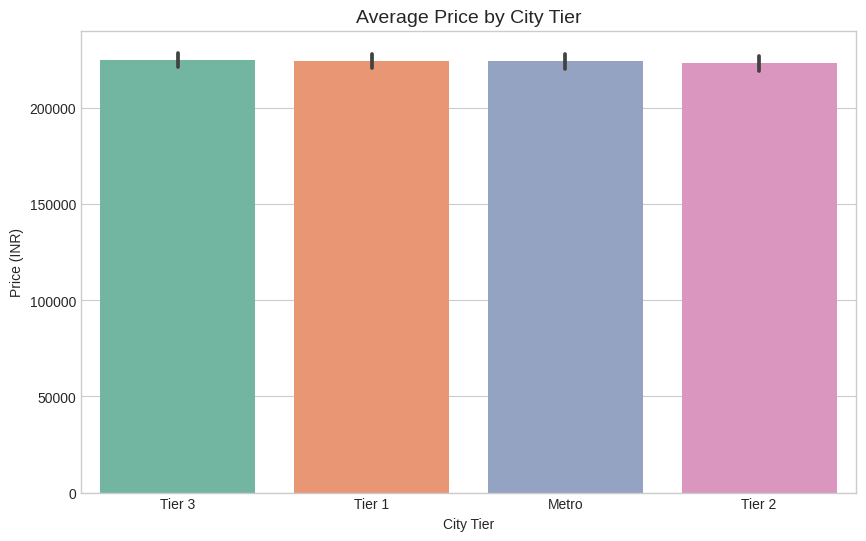

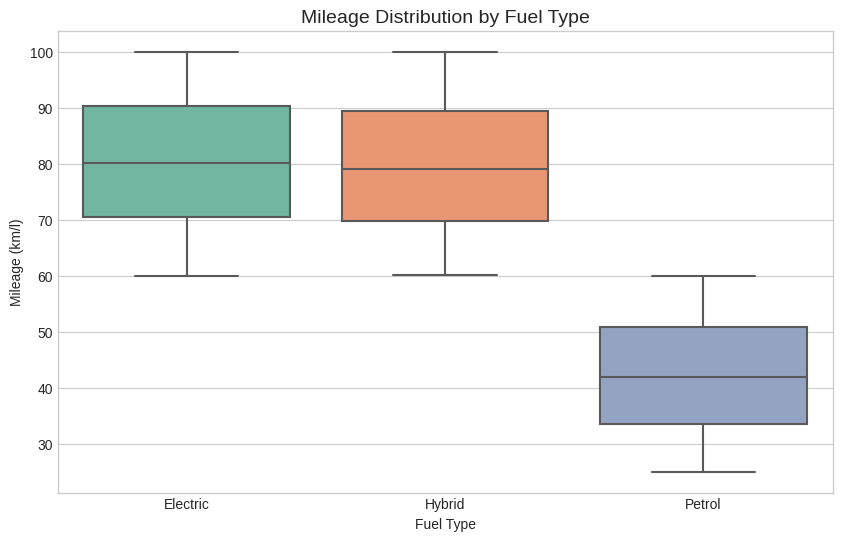

In [6]:
# Create correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# Analyzing the relationship between brand and price
plt.figure(figsize=(14, 6))
sns.boxplot(x='Brand', y='Price (INR)', data=df)
plt.title('Price Distribution by Brand', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Analyzing the relationship between resale price and year of manufacture
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year of Manufacture', y='Resale Price (INR)', hue='Brand', data=df, alpha=0.6)
plt.title('Relationship between Year of Manufacture and Resale Price', fontsize=14)
plt.show()

# Relationship between engine capacity and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine Capacity (cc)', y='Price (INR)', hue='Brand', data=df, alpha=0.6)
plt.title('Relationship between Engine Capacity and Price', fontsize=14)
plt.show()

# Analyzing average price by city tier
plt.figure(figsize=(10, 6))
sns.barplot(x='City Tier', y='Price (INR)', data=df, estimator=np.mean)
plt.title('Average Price by City Tier', fontsize=14)
plt.show()

# Mileage vs. Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='Mileage (km/l)', data=df)
plt.title('Mileage Distribution by Fuel Type', fontsize=14)
plt.show()

<a id="6"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 6: Feature Engineering ⚙️</h2>
</div>

In [7]:
# Create a copy of the dataframe to avoid modifying the original
df_model = df.copy()

# Create 'Age' feature from 'Year of Manufacture'
current_year = 2025  # As per your system date
df_model['Age'] = current_year - df_model['Year of Manufacture']

# Create 'Depreciation Rate' feature
df_model['Depreciation Rate'] = (df_model['Price (INR)'] - df_model['Resale Price (INR)']) / df_model['Price (INR)']

# Create 'Price per CC' feature
df_model['Price per CC'] = df_model['Price (INR)'] / df_model['Engine Capacity (cc)']

# Categorize bikes by price range
df_model['Price Category'] = pd.cut(df_model['Price (INR)'], 
                                   bins=[0, 100000, 200000, 300000, float('inf')],
                                   labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

# Feature for insurance impact
df_model['Insurance Impact'] = df_model['Insurance Status'].map({
    'Active': 1, 
    'Expired': 0.5, 
    'Not Available': 0
})

# Display the engineered features
print("Dataset with engineered features:")
df_model.head()

Dataset with engineered features:


State  Avg Daily Distance (km)          Brand        Model  \
0       Karnataka                    68.84  Royal Enfield   Hunter 350   
1       Rajasthan                    23.80          Bajaj  Dominar 400   
2  Madhya Pradesh                    27.67            KTM     125 Duke   
3       Karnataka                    62.85       Kawasaki    Ninja 300   
4  Madhya Pradesh                    10.62         Yamaha        FZ V3   

   Price (INR)  Year of Manufacture  Engine Capacity (cc) Fuel Type  \
0       252816                 2021                   672  Electric   
1       131100                 2020                   769    Hybrid   
2       201016                 2020                   216    Hybrid   
3       132482                 2021                   556    Petrol   
4       231796                 2019                   298    Petrol   

   Mileage (km/l) Owner Type  Registration Year Insurance Status Seller Type  \
0           78.41     Second               2024           Active  Individual   
1           89.98      Third               2023           Active  Individual   
2           71.46     Second               2023           Active      Dealer   
3           51.73      Third               2021           Active      Dealer   
4           54.72      Third               2019    Not Available  Individual   

   Resale Price (INR) City Tier  Age  Depreciation Rate  Price per CC  \
0           149934.18    Tier 3    4           0.406943    376.214286   
1            66960.30    Tier 3    5           0.489243    170.481144   
2           141522.64    Tier 3    5           0.295963    930.629630   
3            56057.22    Tier 1    4           0.576869    238.276978   
4           132538.36    Tier 3    6           0.428211    777.838926   

  Price Category  Insurance Impact  
0        Premium               1.0  
1      Mid-range               1.0  
2        Premium               1.0  
3      Mid-range               1.0  
4        Premium               0.0

<a id="7"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 7: Advanced Visualization - Insights from Multiple Variables 📊</h2>
</div>

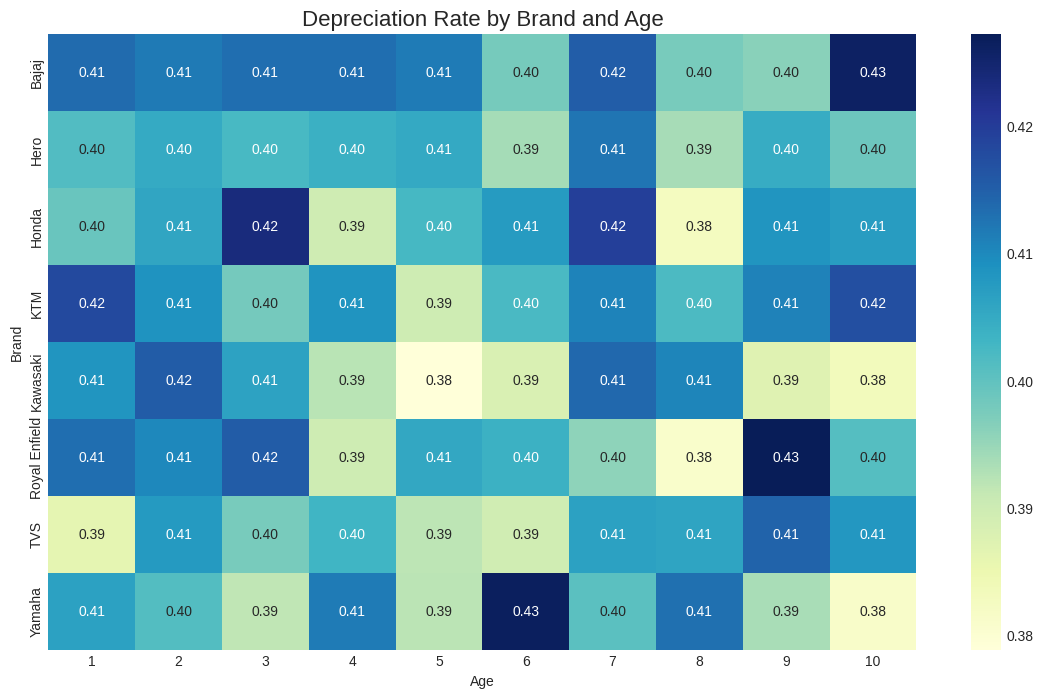

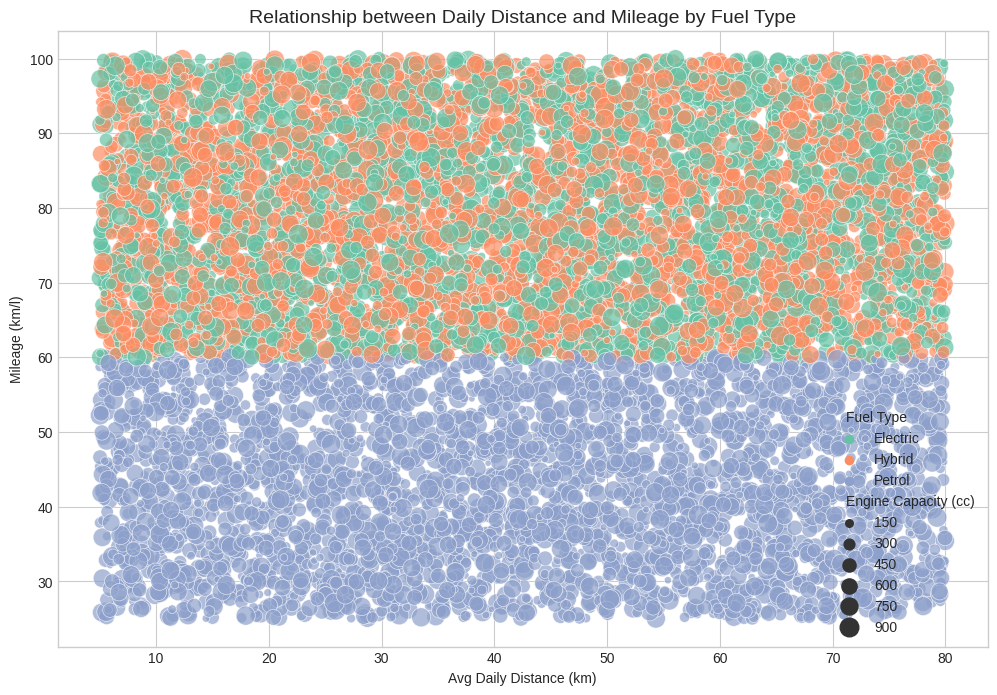

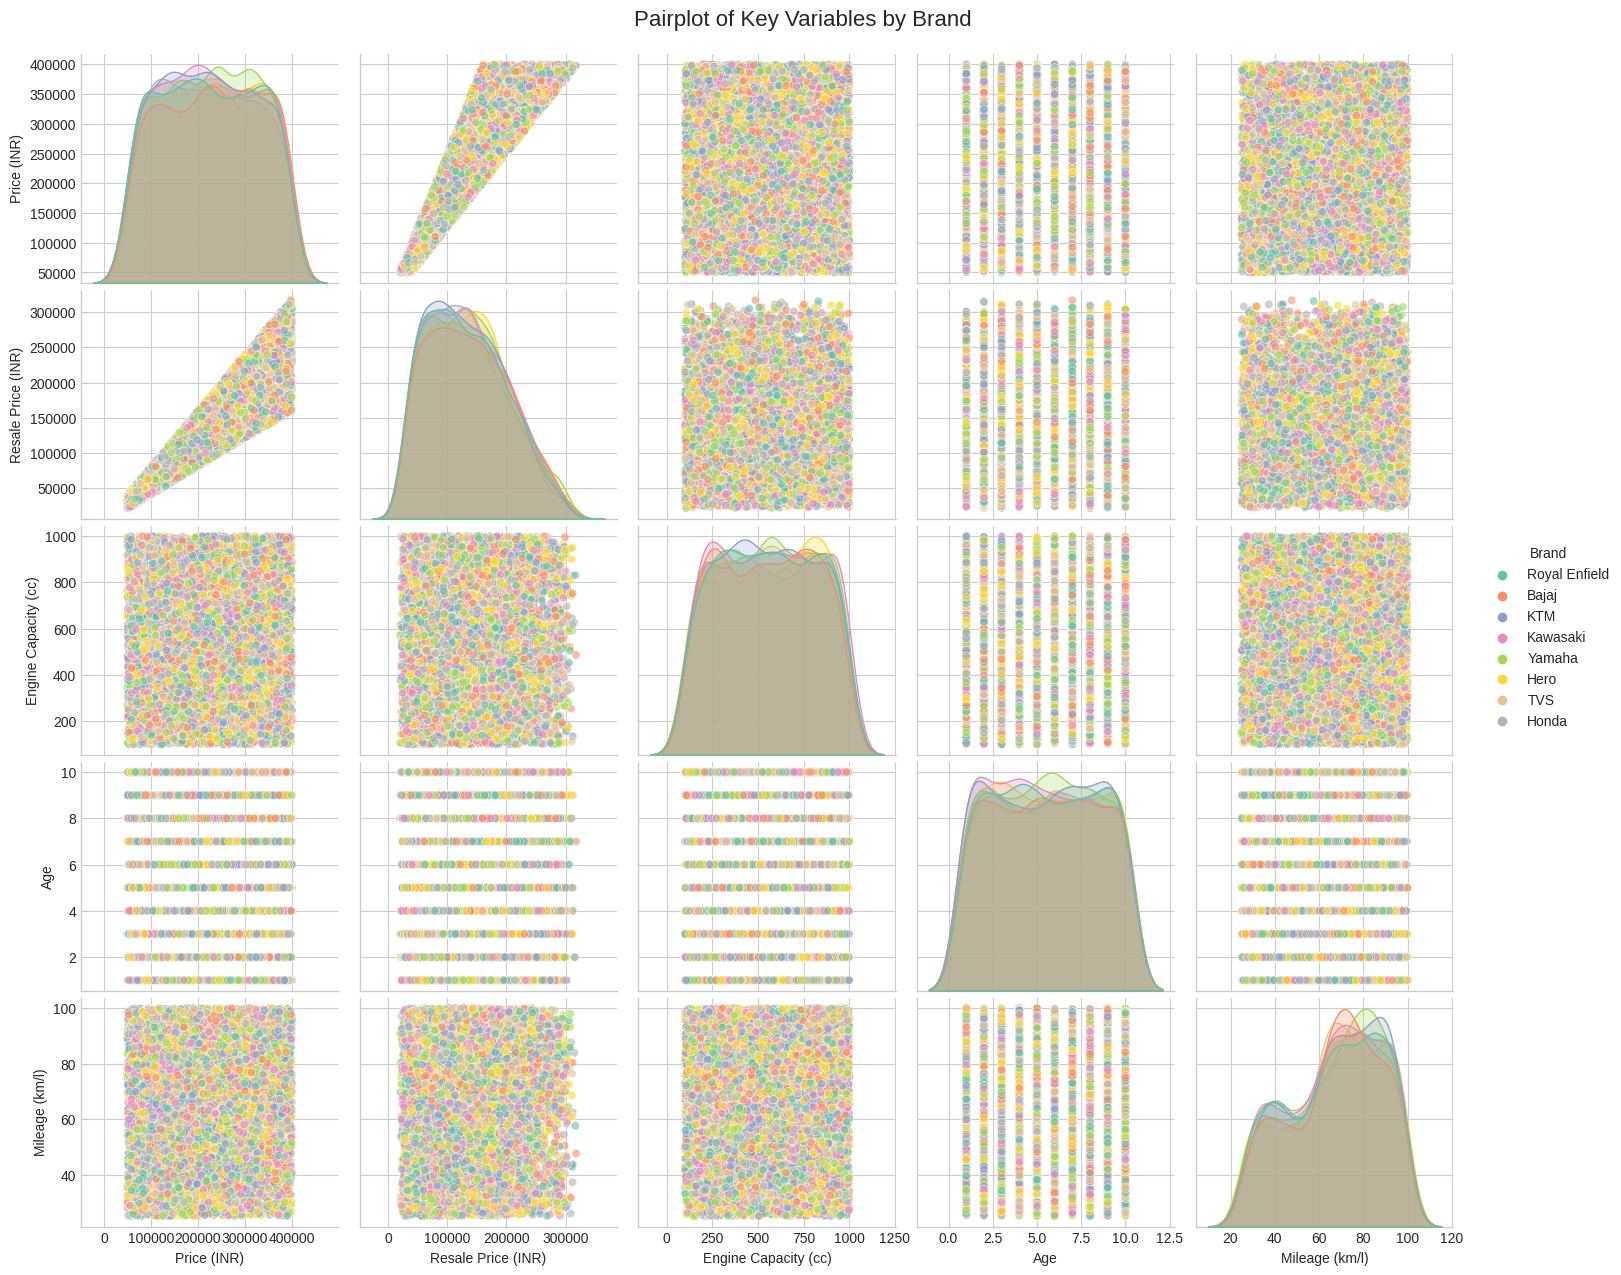

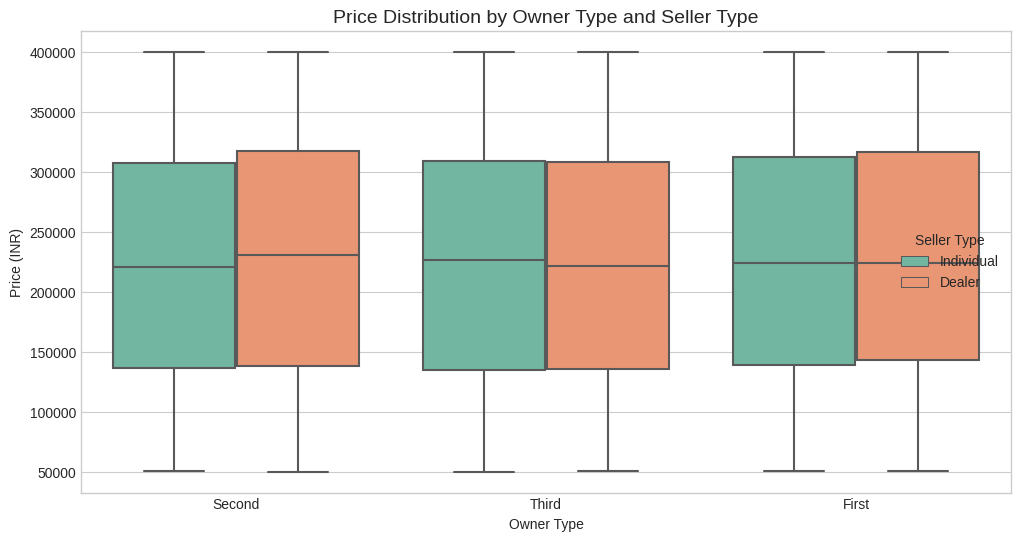

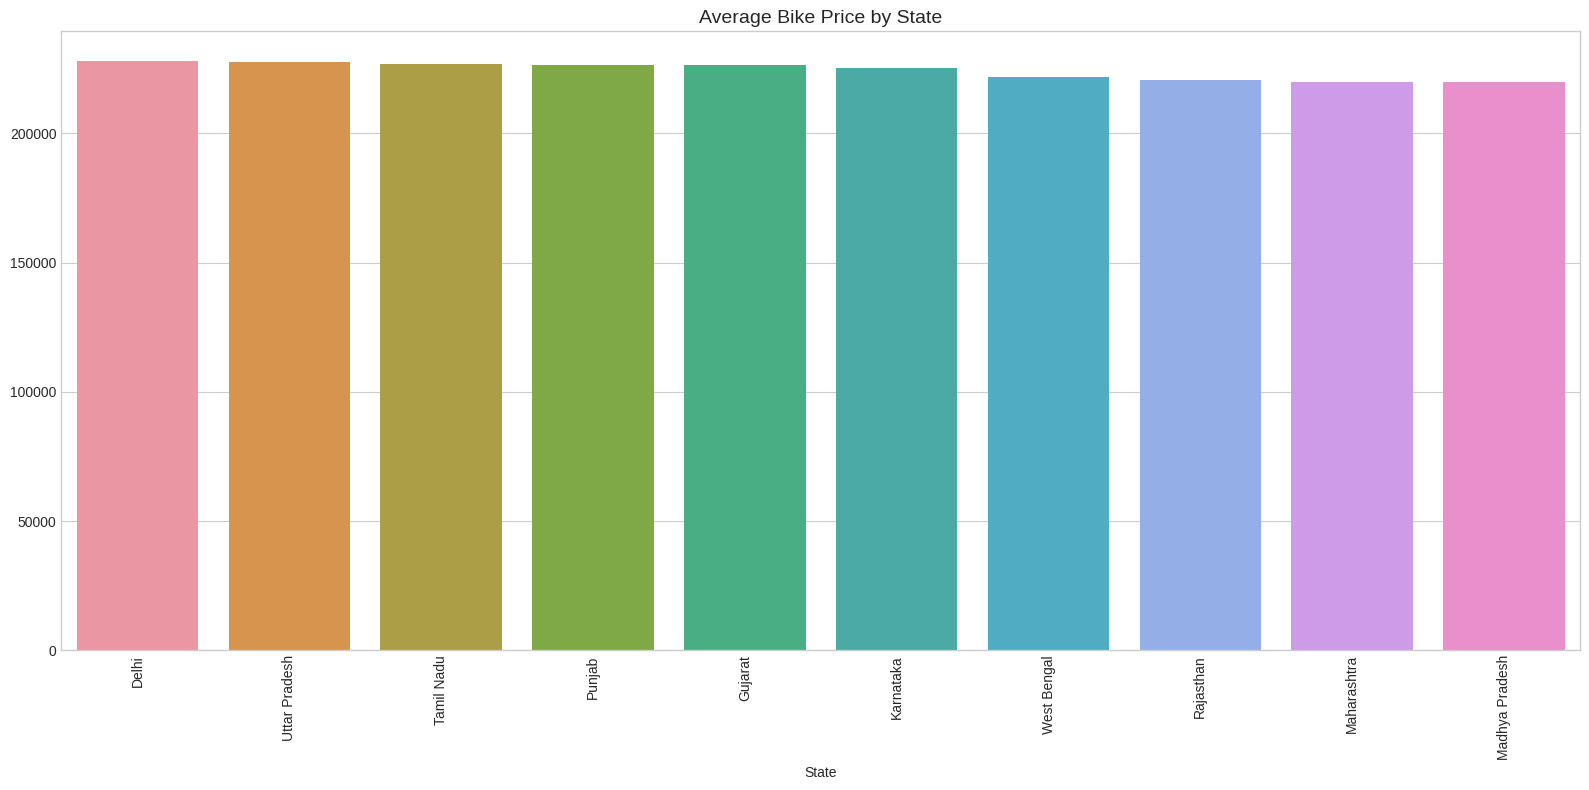

In [8]:
# Resale value ratio by brand and age
plt.figure(figsize=(14, 8))
pivot_data = df_model.pivot_table(
    values='Depreciation Rate', 
    index='Brand', 
    columns='Age', 
    aggfunc='mean'
)
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Depreciation Rate by Brand and Age', fontsize=16)
plt.show()

# Average daily distance vs mileage by fuel type
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_model, 
    x='Avg Daily Distance (km)', 
    y='Mileage (km/l)', 
    hue='Fuel Type', 
    size='Engine Capacity (cc)', 
    sizes=(20, 200), 
    alpha=0.7
)
plt.title('Relationship between Daily Distance and Mileage by Fuel Type', fontsize=14)
plt.show()

# Pairplot of key numerical variables
key_vars = ['Price (INR)', 'Resale Price (INR)', 'Engine Capacity (cc)', 'Age', 'Mileage (km/l)']
sns.pairplot(df_model[key_vars + ['Brand']], hue='Brand', height=2.5, aspect=1.2, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Variables by Brand', y=1.02, fontsize=16)
plt.show()

# Price distribution by owner type and seller type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Owner Type', y='Price (INR)', hue='Seller Type', data=df_model)
plt.title('Price Distribution by Owner Type and Seller Type', fontsize=14)
plt.show()

# Geographic analysis - average price by state
plt.figure(figsize=(16, 8))
state_price = df_model.groupby('State')['Price (INR)'].mean().sort_values(ascending=False)
sns.barplot(x=state_price.index, y=state_price.values)
plt.title('Average Bike Price by State', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a id="8"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 8: Preparing Data for Modeling 🔧</h2>
</div>

In [9]:
# Define target variable - let's predict Resale Price
X = df_model.drop(['Resale Price (INR)', 'Model'], axis=1)  # Drop Model as it has too many unique values
y = df_model['Resale Price (INR)']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create preprocessing pipeline
# Numerical features: StandardScaler
# Categorical features: OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing to training data and preview
X_train_processed = preprocessor.fit_transform(X_train)
print(f"Processed training data shape: {X_train_processed.shape}")

Categorical columns: ['State', 'Brand', 'Fuel Type', 'Owner Type', 'Insurance Status', 'Seller Type', 'City Tier']
Numerical columns: ['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year', 'Age', 'Depreciation Rate', 'Price per CC', 'Insurance Impact']
Training set shape: (8000, 18), Testing set shape: (2000, 18)
Processed training data shape: (8000, 43)


<a id="9"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 9: Model Building and Training - Linear Regression 📉</h2>
</div>

Linear Regression Model Performance:
Mean Squared Error: 137093964.71
Root Mean Squared Error: 11708.71
R-squared Score: 0.9688
Mean Absolute Error: 8680.21


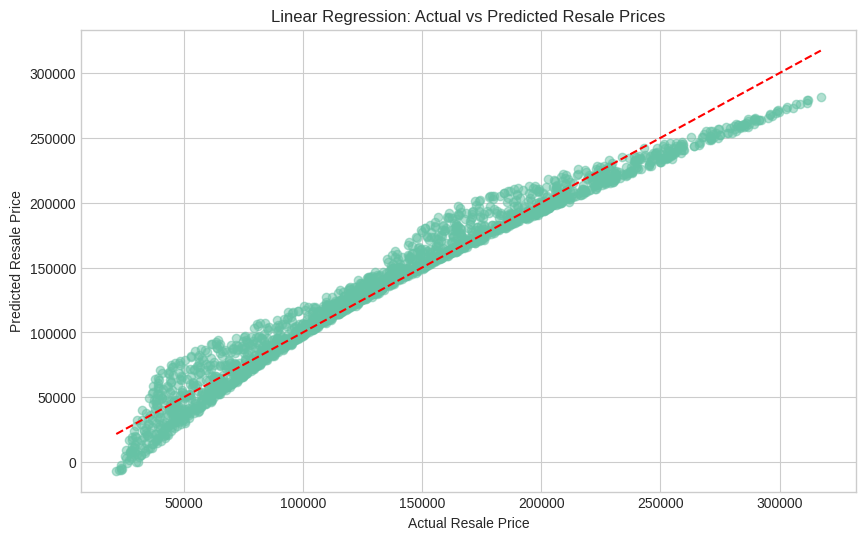

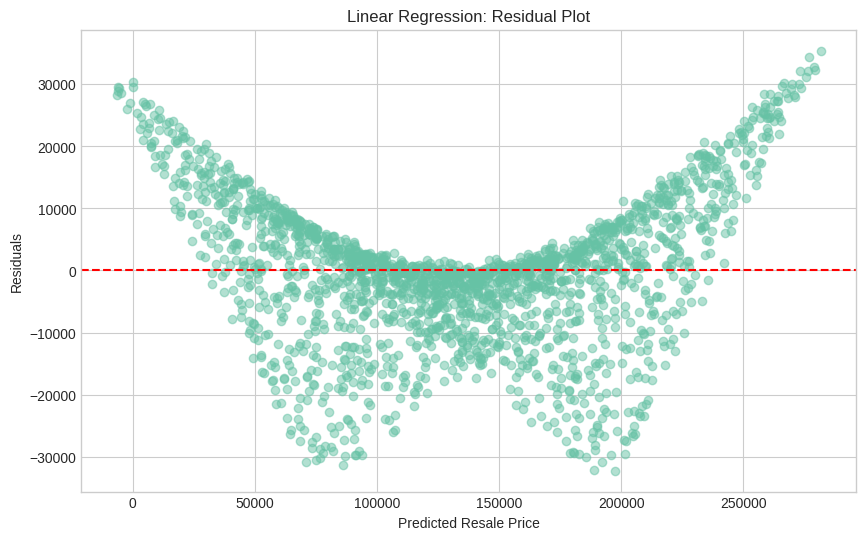

In [10]:
# Create a linear regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")
print(f"R-squared Score: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Linear Regression: Actual vs Predicted Resale Prices')
plt.show()

# Plot residuals
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Resale Price')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.show()

<a id="10"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 10: Advanced Models - Random Forest 🌲</h2>
</div>

Random Forest Model Performance:
Mean Squared Error: 884170.56
Root Mean Squared Error: 940.30
R-squared Score: 0.9998
Mean Absolute Error: 653.47


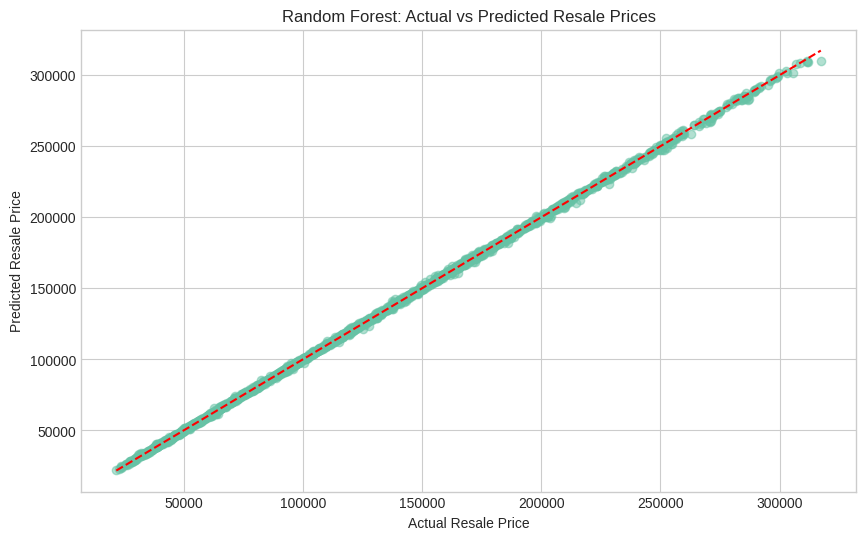

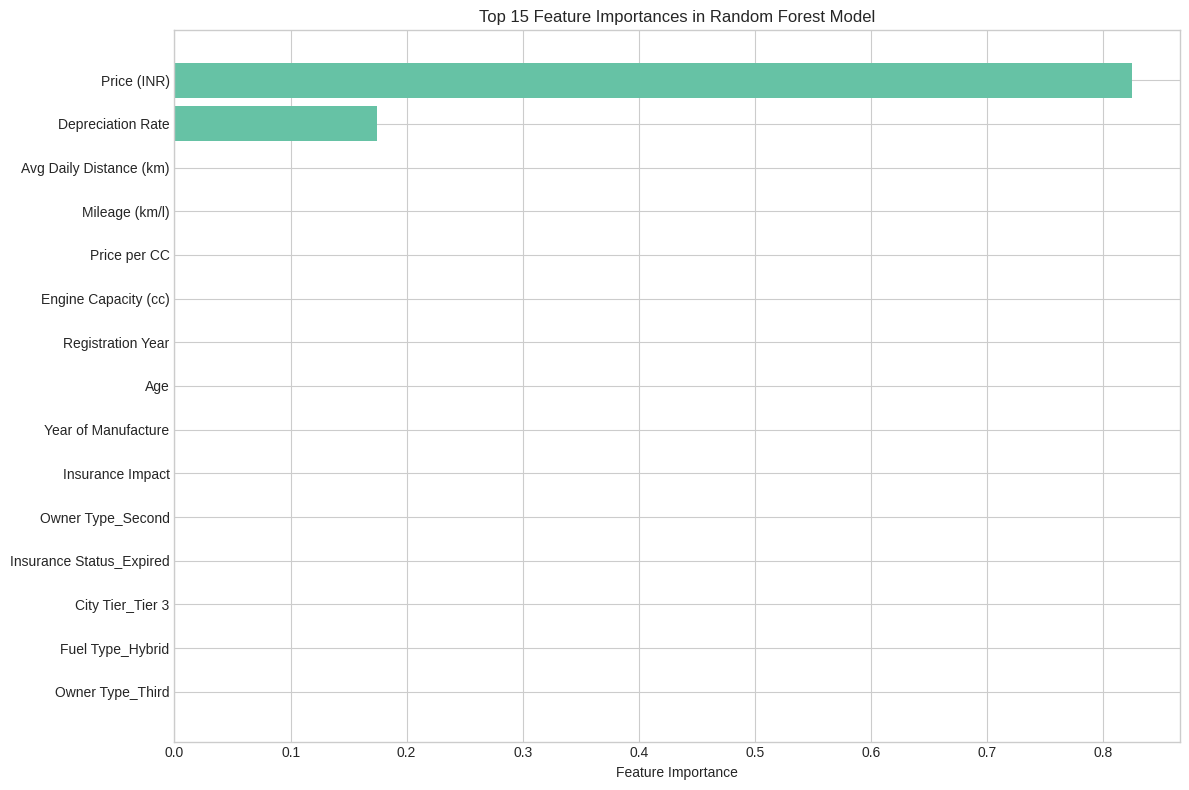

In [11]:
# Create a Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Random Forest: Actual vs Predicted Resale Prices')
plt.show()

# Feature importance
rf_model = rf_pipeline.named_steps['regressor']
feature_names = (numerical_cols + 
                 list(rf_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_cols)))

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances
indices = np.argsort(importances)[-15:]  # Get indices of top 15 features

plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()

<a id="11"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 11: Gradient Boosting Model 🚀</h2>
</div>

Gradient Boosting Model Performance:
Mean Squared Error: 3603704.34
Root Mean Squared Error: 1898.34
R-squared Score: 0.9992
Mean Absolute Error: 1467.85


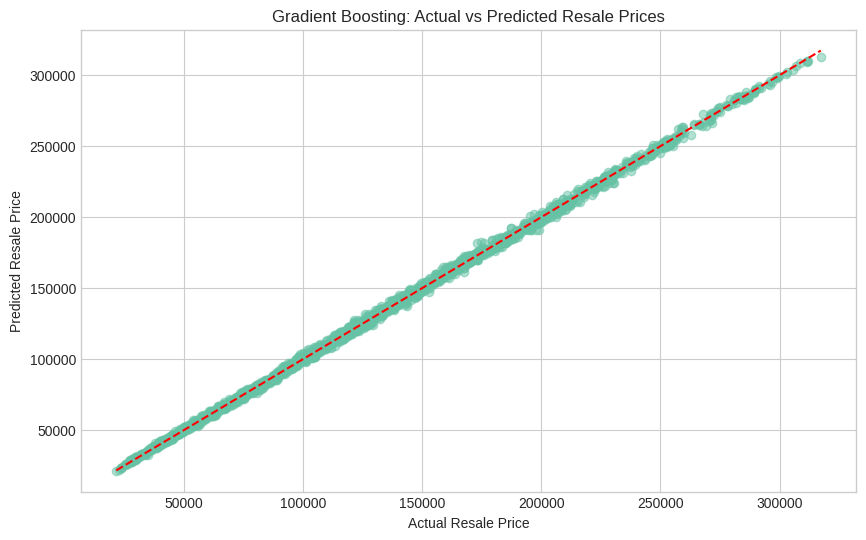

In [12]:
# Create a Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Model Performance:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"Root Mean Squared Error: {rmse_gb:.2f}")
print(f"R-squared Score: {r2_gb:.4f}")
print(f"Mean Absolute Error: {mae_gb:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Gradient Boosting: Actual vs Predicted Resale Prices')
plt.show()

<a id="12"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 12: Model Comparison 📊</h2>
</div>

Model Comparison:


Model           MSE          RMSE        R²          MAE
0  Linear Regression  1.370940e+08  11708.713196  0.968787  8680.213216
1      Random Forest  8.841706e+05    940.303442  0.999799   653.468903
2  Gradient Boosting  3.603704e+06   1898.342525  0.999180  1467.853154

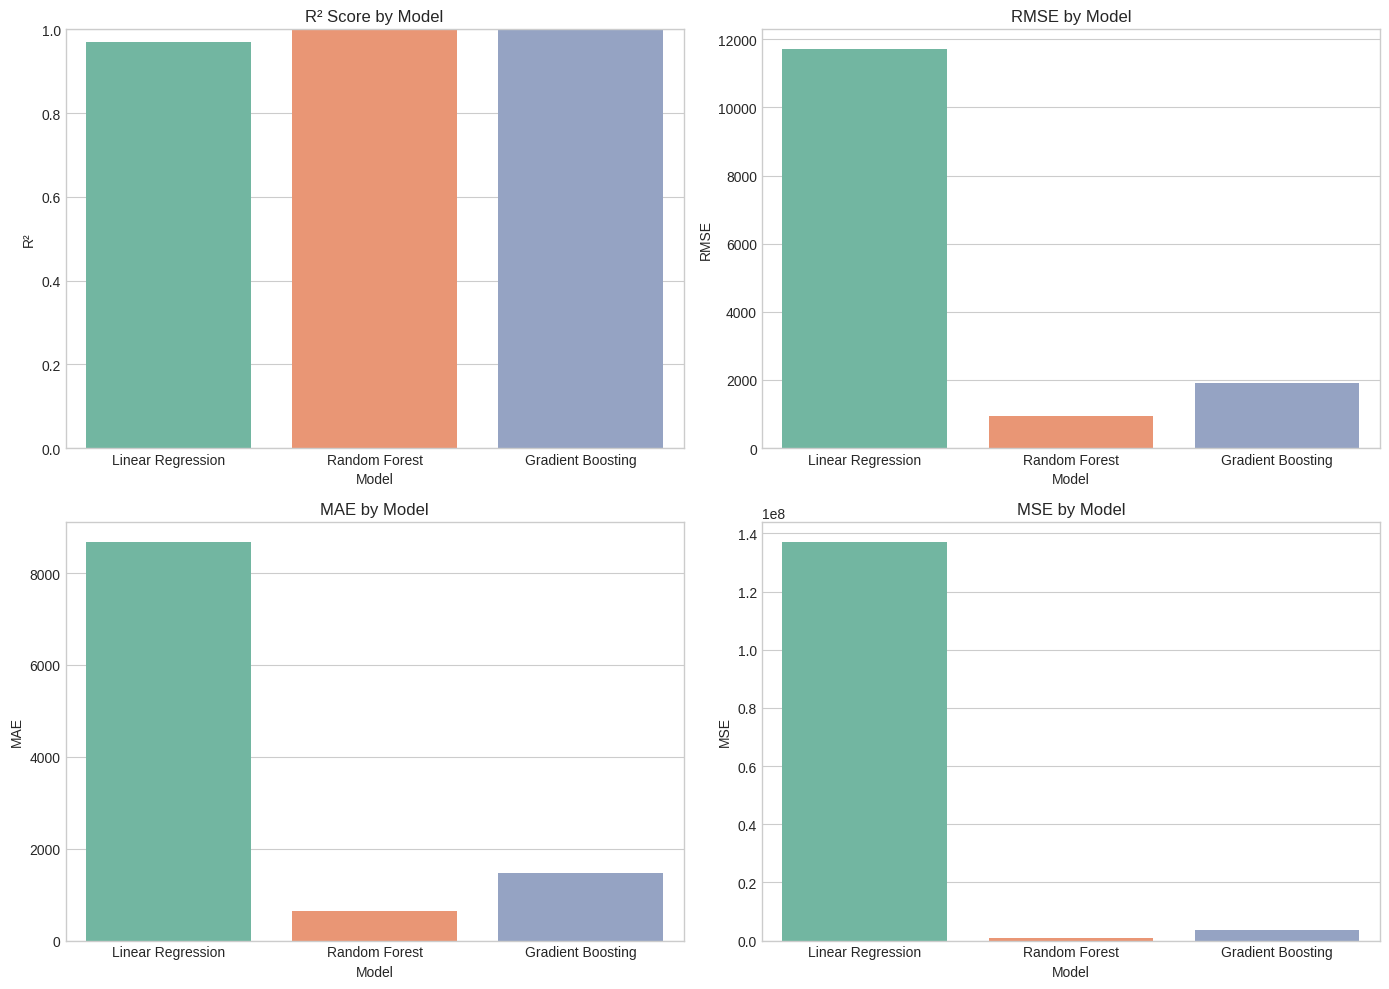

In [13]:
# Collect results for comparison
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_scores = [mse_lr, mse_rf, mse_gb]
rmse_scores = [rmse_lr, rmse_rf, rmse_gb]
r2_scores = [r2_lr, r2_rf, r2_gb]
mae_scores = [mae_lr, mae_rf, mae_gb]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores,
    'MAE': mae_scores
})

print("Model Comparison:")
display(comparison_df)

# Visualize model performance
plt.figure(figsize=(14, 10))

# R² comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='R²', data=comparison_df)
plt.title('R² Score by Model')
plt.ylim(0, 1)

# RMSE comparison
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE', data=comparison_df)
plt.title('RMSE by Model')

# MAE comparison
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE', data=comparison_df)
plt.title('MAE by Model')

# MSE comparison
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='MSE', data=comparison_df)
plt.title('MSE by Model')

plt.tight_layout()
plt.show()

<a id="13"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 13: Hyperparameter Tuning for Best Model ⚙️</h2>
</div>

Performing grid search for Random Forest model...
Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}

Tuned Random Forest Model Performance:
Mean Squared Error: 852457.51
Root Mean Squared Error: 923.29
R-squared Score: 0.9998
Mean Absolute Error: 645.43


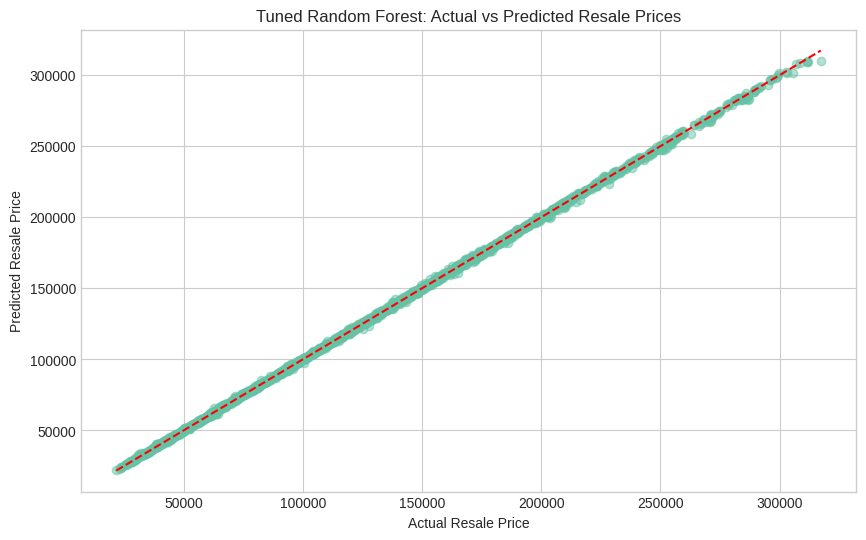

In [14]:
# Assuming Random Forest performed best, let's tune it
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

# Create grid search
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit grid search
print("Performing grid search for Random Forest model...")
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Calculate metrics for best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("\nTuned Random Forest Model Performance:")
print(f"Mean Squared Error: {mse_best_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_best_rf:.2f}")
print(f"R-squared Score: {r2_best_rf:.4f}")
print(f"Mean Absolute Error: {mae_best_rf:.2f}")

# Plot actual vs predicted values for tuned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Tuned Random Forest: Actual vs Predicted Resale Prices')
plt.show()

<div style="background-color: #d9edf7; border-left: 6px solid #31708f; padding: 15px; font-family: Arial, sans-serif;">
    <h2 style="text-align: center; color: #3c3c3c;">
        🚀 Found my analysis and notebook useful? 
    </h2>
    <p style="text-align: center; color: #555;">
        Your feedback would mean the world! 💬 If my work has been helpful, please consider dropping a comment and an upvote. 
        <strong>Your support fuels my drive to create even better insights! 🌟</strong>
    </p>
</div>